# Welcome to the MozFest 2015 ContentMine Session

<img src="CM_logo.png" align="left" height=50% width=50%><img src="Mozfest Logo.png" align="right" height=50% width=50%>

## What is this, where am I?

This is an ipython-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find all necessary informations on our central [github repository](https://github.com/ContentMine/2015-11-07-mozfest15) and you can share your thoughts and questions in realtime with others on our [pad](http://pads.cottagelabs.com/p/mozfest15).

## What are we going to do?



<img src="acks-highlighted.png" align="left" height=100% width=100%>


We will look at the occurrences of organizations/locations/persons in the acknowledgements section of a paper. We show you how to use the notebook, explain what the data is about, and provide you with a sandbox environment where you can investigate the data on your own - with our help of course.

## Get in touch with jupyter notebook
Here you can play around with your notebook. You can not make any mistake, so don't be afraid to try the magic of reproducible science yourself.

**Assign a string to a variable**

Select the next cell and execute it with Ctrl+Enter or by clicking "Play"

In [2]:
# assign string to variable
myString = 'Hello mozillian!' # change the string to your needs
print myString

Hello mozillian!


**Commenting and uncommenting code**

In [20]:
myString = 'This is my second print out.' 
#print myString # to uncomment this line remove the first #

## Set up your environment
Import the prepared python functions into the notebook. Hackers and anyone who want to look under the hood can find the prepared functions in the resources folder, and the dataset in the trialsjournal folder.

In [4]:
from resources.readctree import *
from resources.analysis import *
%matplotlib inline

### Reading in the dataset

In the next cell we read in the prepared data, which is located in the trialsjournal folder, into the notebook and assign it to the TRIALS variable. This data contains the results from executing the ContentMine tool chain. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset.

In [5]:
TRIALS = CProject("trialsjournal")

So we have

In [6]:
TRIALS.size

2348

papers in our dataset.

## Let's dive into the data!

Content mining can not only be used for science, but also for questions of public interest, such as which agency or company contributes to which research. This is what we're going to look at now.

First we create a network between papers and entities such as funding agencies or pharmaceutical companies, but also locations or persons mentioned in the "Acknowledgement" section of the paper. In this network a nodes is either a unique identifier of a paper, or the name of an entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified with the help of the [Stanford Named Entity Parser](http://nlp.stanford.edu/software/CRF-NER.shtml). This means, that we have after this the full relationships of the entities for each paper's acknowledgement section stored in the network data.

In this section you can work on your own, and we will help you with any questions.

### Choose the type of entity
Uncomment the type of entity you want to take a look at: "person", "organization" or "location". 
Be aware: This will be your entity type for the rest of the hacking session.

In [7]:
# B = TRIALS.create_network("entities", "PERSON")
B = TRIALS.create_network("entities", "ORGANIZATION")
# B = TRIALS.create_network("entities", "LOCATION")

### Make a first visualization
To get a better idea of what we are talking about, we will now create a visualization of the papers-entities network. Depending on your computer, plotting the network can take a few seconds. In this step there also happens the transformation from a bipartite (entities and papers) to a monopartite network (just entities). If you want to learn more about networks, there is a sprint this afternoon (Analysing and Visualising Network Data with Max Franz (University of Toronto), 15:30-16:30).

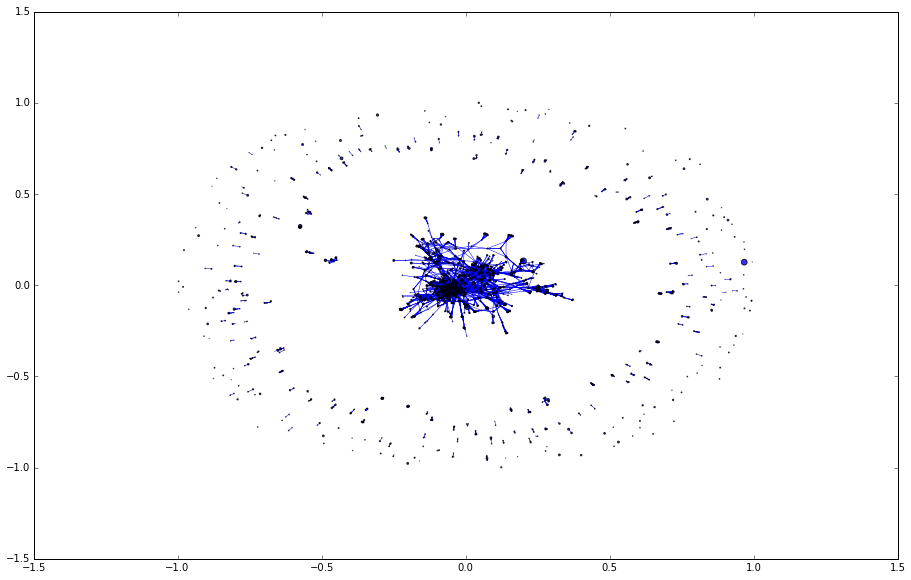

The number of papers in the network:  1191
The number of facts (organizations/persons/locations/):  3009


In [8]:
paper_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
fact_nodes = set(B) - paper_nodes # subtracts the paper nodes from the dataset
G = bipartite.weighted_projected_graph(B, fact_nodes) # projects the bipartite into a monopartite network
plotGraph(G, "blue").show()
print "The number of papers in the network: ", len(paper_nodes)
print "The number of facts (organizations/persons/locations/): ", len(fact_nodes)

In the new network there are only nodes of entities, and a link is created by them if they are mentioned by the same paper. In this way it is possible to identify funding agencies or corporations, that are more closely related than others.

## Find your own entity
The next cells are kind of a sandbox to look into the dataset for yourself.

**Find the most mentioned organizations/persons/locations**

The next function will show us the Top 10 persons/organizations/locations with the most connections to other entities (so called degree centrality). It will give you a certain part of the list (which is sorted in descending order, with the highest connected node first). You can view different parts of the list by changing `start_with` and `how_many`. 

In [14]:
start_with = 0 # enter a number here
how_many = 10 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(G)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print node, len(G.neighbors(node))

Department of Health 410
NIHR 405
NHS 391
National Institute for Health Research 353
Medical Research Council 153
MRC 135
Cancer Research UK 128
National Institutes of Health 119
British Heart Foundation 113
NHS Foundation Trust 109


**Choose one specific entity somewhere between 0 and 30 for your further analysis.**

Change the string to your chosen entity. If you choose one with more than 5 neighbors it should give you some interesting results.

In [11]:
your_variable = "Kirby Institute"

**Check if your entity is in the dataset**

In [12]:
search_for = "Kirby Institute" # you should change the string to your chosen entity 
search_for in fact_nodes

True

## Look at your neighbors
We can have a closer look at the number and name of neighbors of a node through the "neighbors" function. Pick a name from the list above!

In [13]:
print "Number of neighbors:", len(G.neighbors(your_variable))
for neighbor in G.neighbors(your_variable):
    print neighbor

Number of neighbors: 4
Gilead Sciences
Australian Government Department of Health
Faculty of Medicine
University of New South Wales


## Find local communities
We identify the three biggest communities of entities and plot them separately. A community subgraph is a collection of e.g. persons that are connected with each other, but not with the rest of the network. It also prints the location/organization/perons with the most connections in the community.

UK


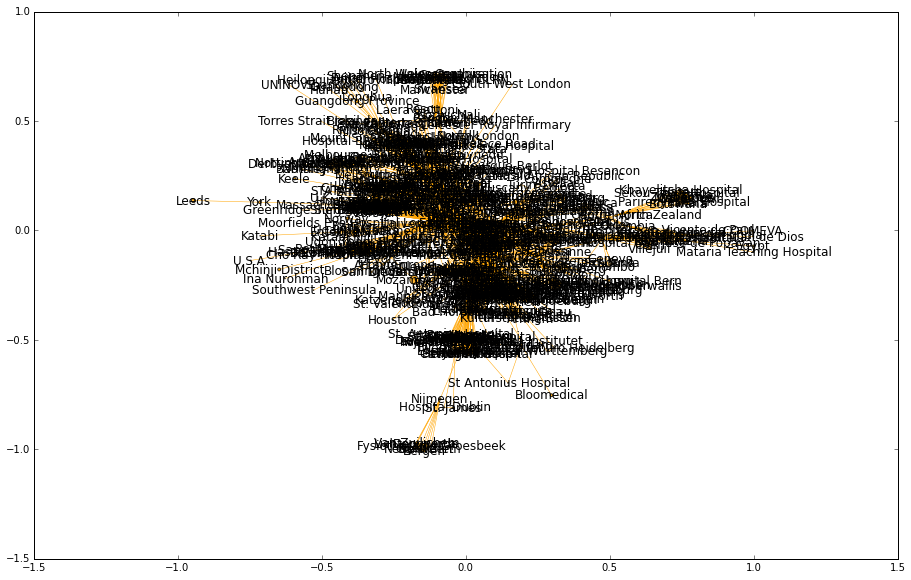

Japan


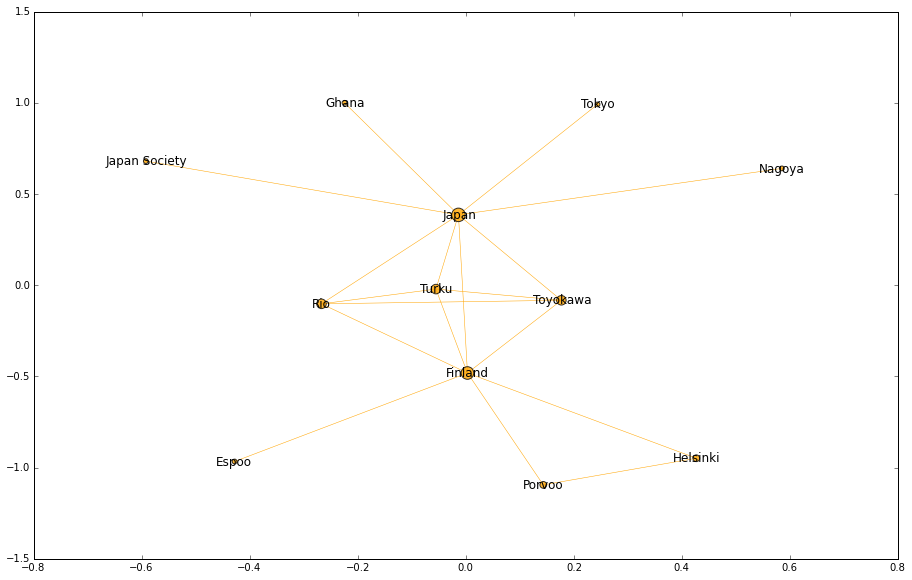

Rammelsberg


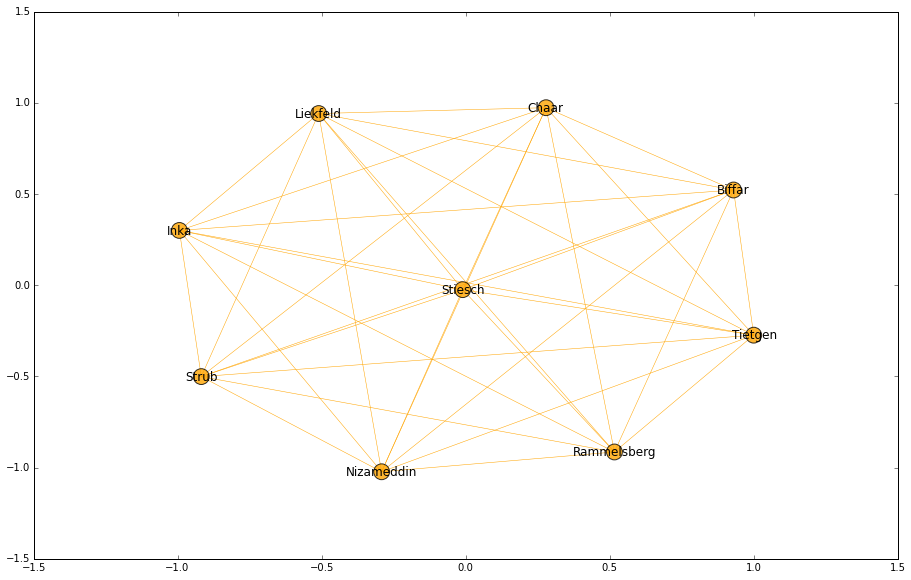

In [23]:
start_with = 0 # pick a number between 1 and 50
how_many = 3 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[start_with:start_with+how_many]
for sg in subgraphs:
    degreeCent = nx.algorithms.degree_centrality(sg)
    print max(degreeCent, key=degreeCent.get)
    plotGraph(sg, "orange").show() # choose a color, e.g. red, blue, green, ...

### Your network
The next cell creates a high resolution visualization of the network around your chosen organization/person/location, where related facts, papers they are mentioned in, and also the authors who wrote the papers are visualized. The network will also be saved onto your disk for further usage, like wallpapers, blogging or documentation. You can find it in the MozFest2015 folder.

Don't forget to choose a color!

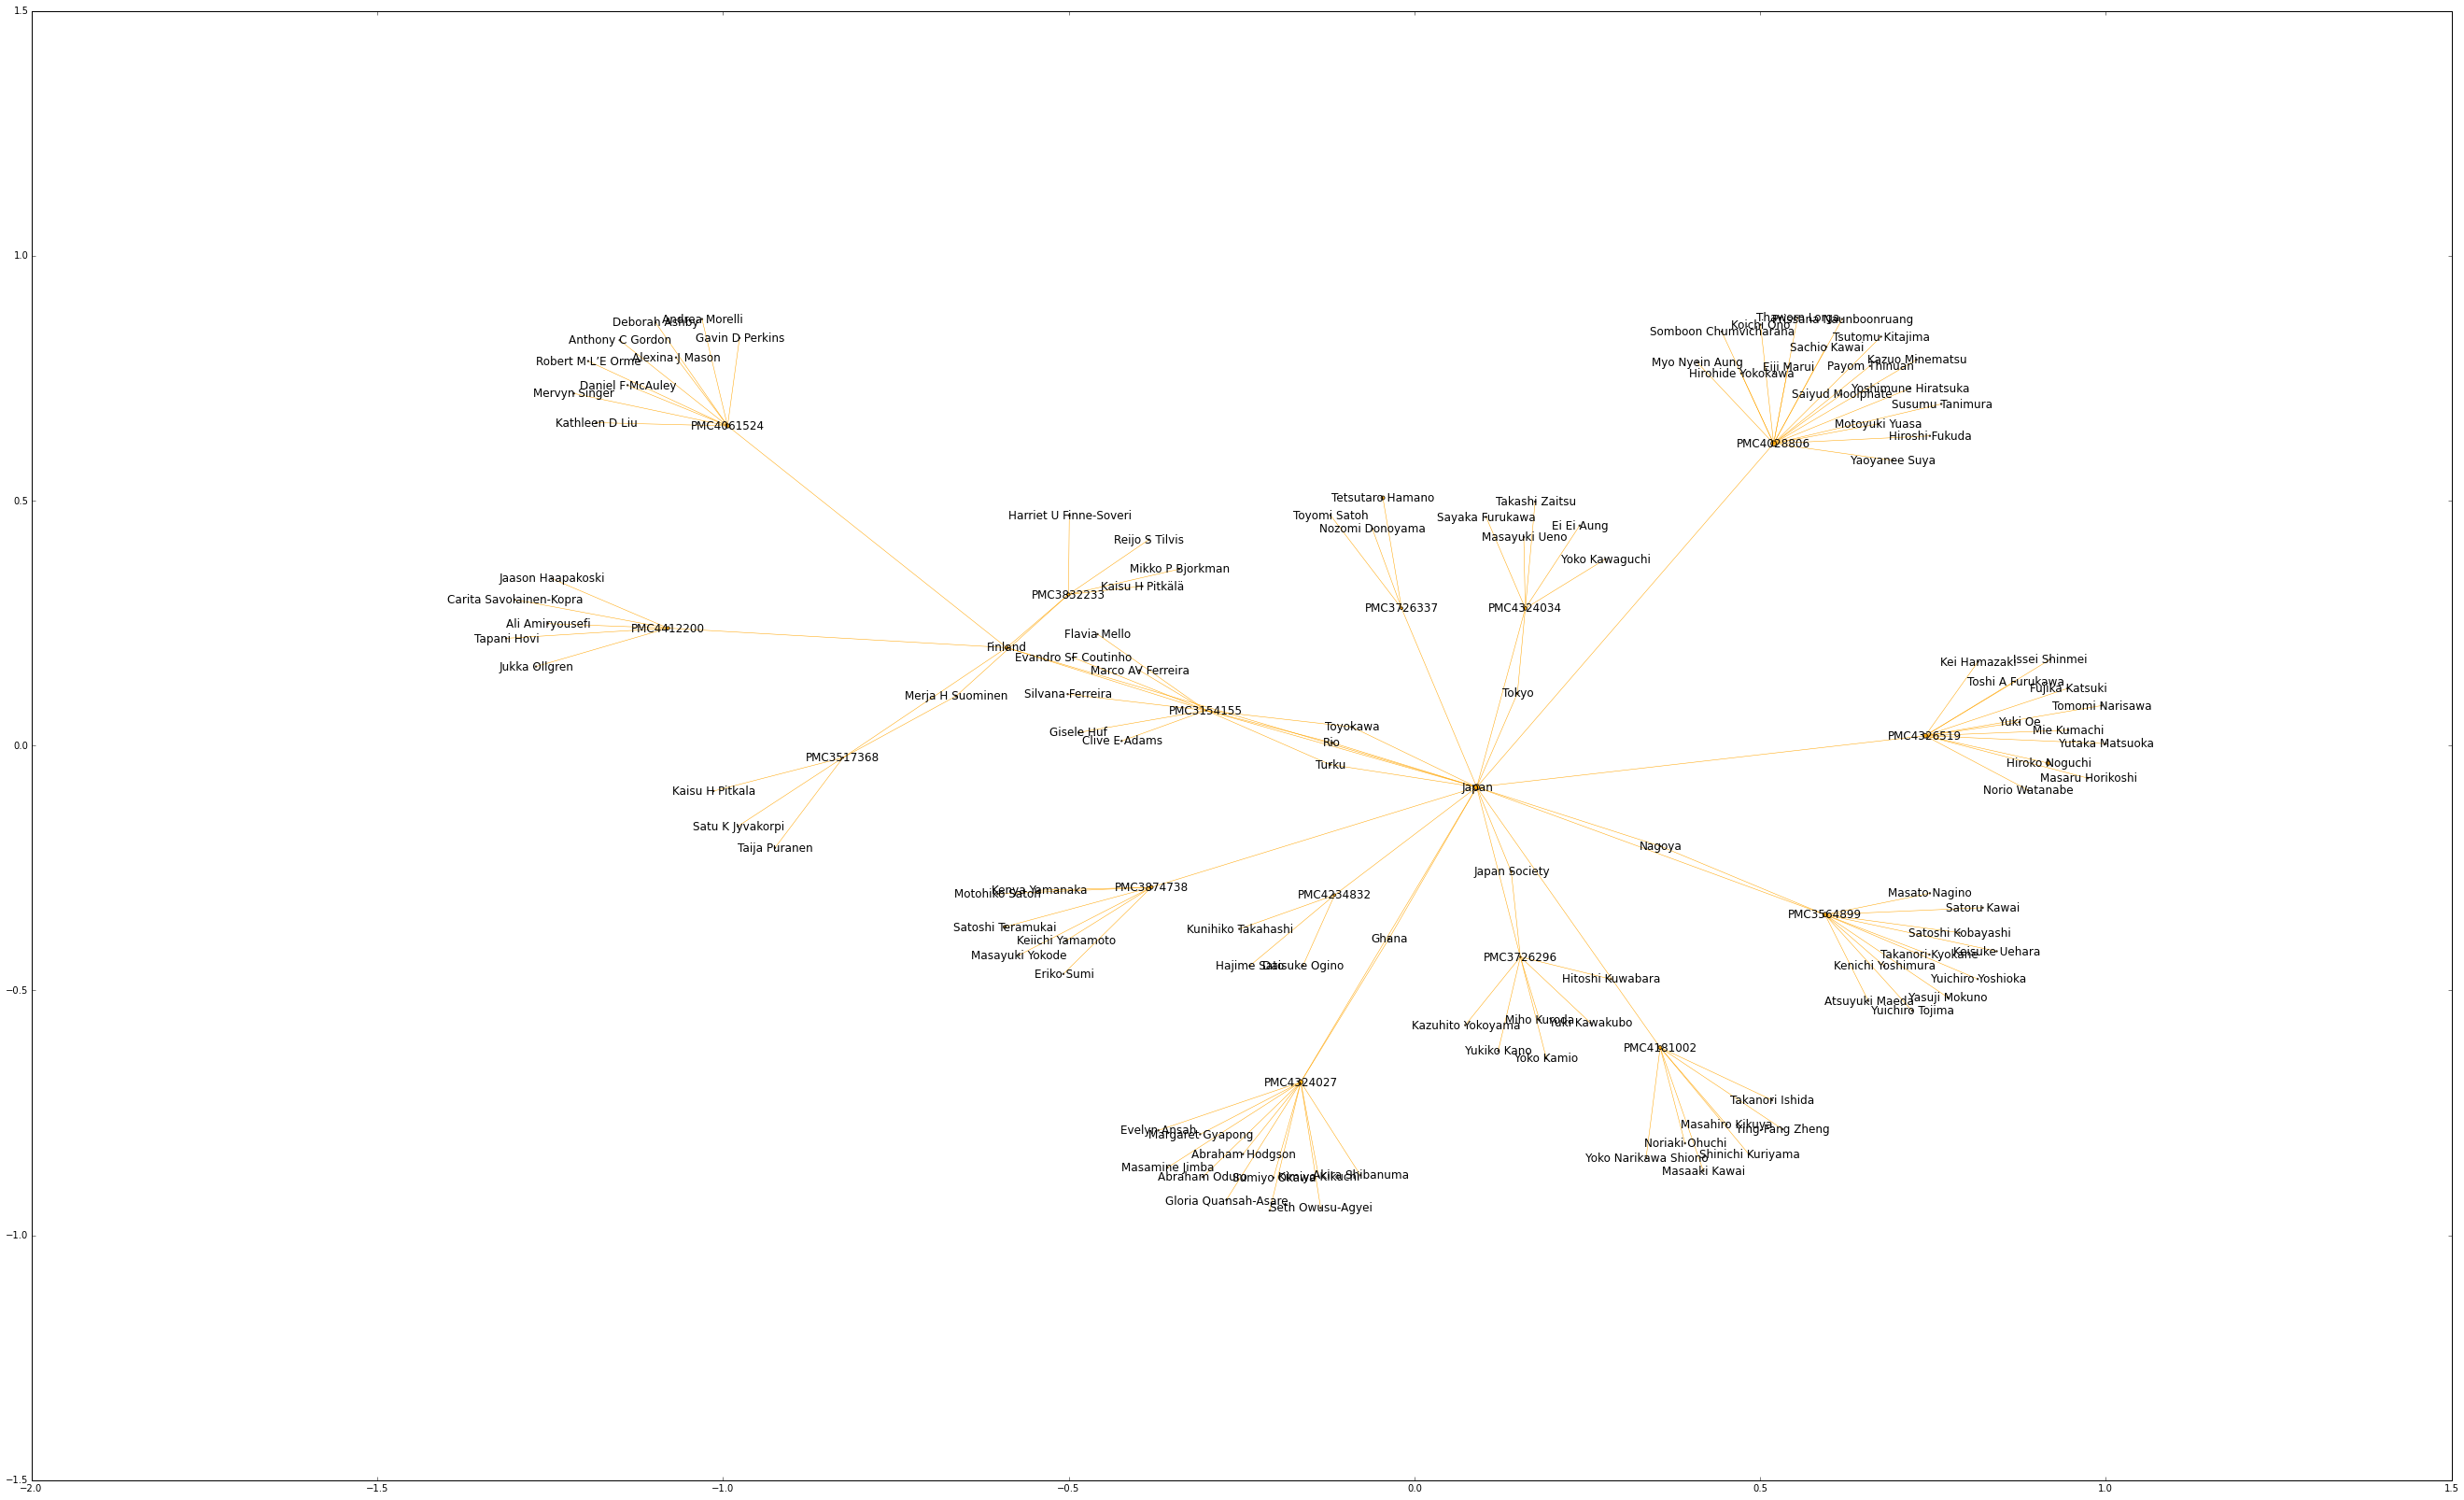

In [21]:
your_graph = create_subgraph(TRIALS, B, G, your_variable)
save_graph(your_graph, "orange")

## Put a fact into context

In the next cell you can enter an institution/location/person of you interest, and see in which papers they are mentioned, what their titles are. Depending on how busy it was, the list can get a bit long! You can look into the `trialsjournal` folder, open the sbfolder with the ID, and compare it with the acknowledgements section of the paper.

In [17]:
# your_variable = "Japan"
for ID in B.neighbors(your_variable):
    print ID, TRIALS.get_title(ID)
    print TRIALS.get_ctree(ID).get_section("Acknowledgements")

PMC4412197 Assessing site performance in the Altair study, a multinational clinical trial
The authors would like to thank all the Altair study participants. The Altair study was funded from the following sources: the Australian Government Department of Health and Ageing and an unrestricted grant from Gilead Sciences. We wish to thank Gilead Sciences for provision of the fixed-dose combination of TDF/FTC and for study funding to complete the trial. This was an investigator-driven study, although representatives of Gilead Sciences reviewed the manuscript prior to submission. The views expressed in this publication do not necessarily represent the position of the Australian Government. The Kirby Institute is affiliated with the Faculty of Medicine, University of New South Wales. No funding was received for this manuscript.
{u'PERSON': [], u'LOCATION': [], u'ORGANIZATION': [u'Australian Government Department of Health', u'Gilead Sciences', u'Faculty of Medicine', u'University of New South 